# Data Manipulation and Plotting for Fluid Mechanics

Welcome to this new notebook! In this session, we'll focus on techniques for handling and visualizing data, which are essential for analyzing experimental or simulation results in fluid mechanics.

## Topics Covered


- **Visualization:**  
  Create a variety of plots (line plots, scatter plots, histograms, etc.) using Matplotlib. We'll also cover customizing plots with titles, labels, legends, and gridlines, and will learn how to export them with decent quality.
  


Let's begin by loading `Numpy` and `Matplotlib`

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Example 1: Basic plotting

Let's plot the function $y = \sin{x}$ over $0< x < 2 \pi$. We will add a legend that shows the name of the function and some labels for the x- and y-axes.

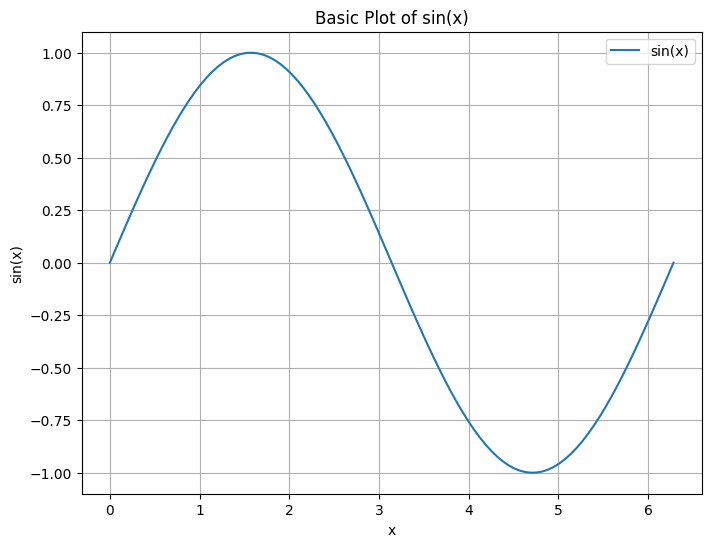

In [2]:
# Define the domain and a function to plot
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y, label="sin(x)")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.title("Basic Plot of sin(x)")
plt.legend()
plt.grid(True)
plt.show()

#### Example 2: Creating multiple panels (i.e. subplots)

We create an array of $n\times m$ plots illustrating different trigonometric functions. Note that we pass the parameter `sharex=True` to the `subplots` function to ensure that all subplots use the same x-axis range and tick marks. The same can be done for the y-axis, but this only convenient if we are certain that the y-range of all the functions is similar. This saves some space and makes the plot somewhat more elegant

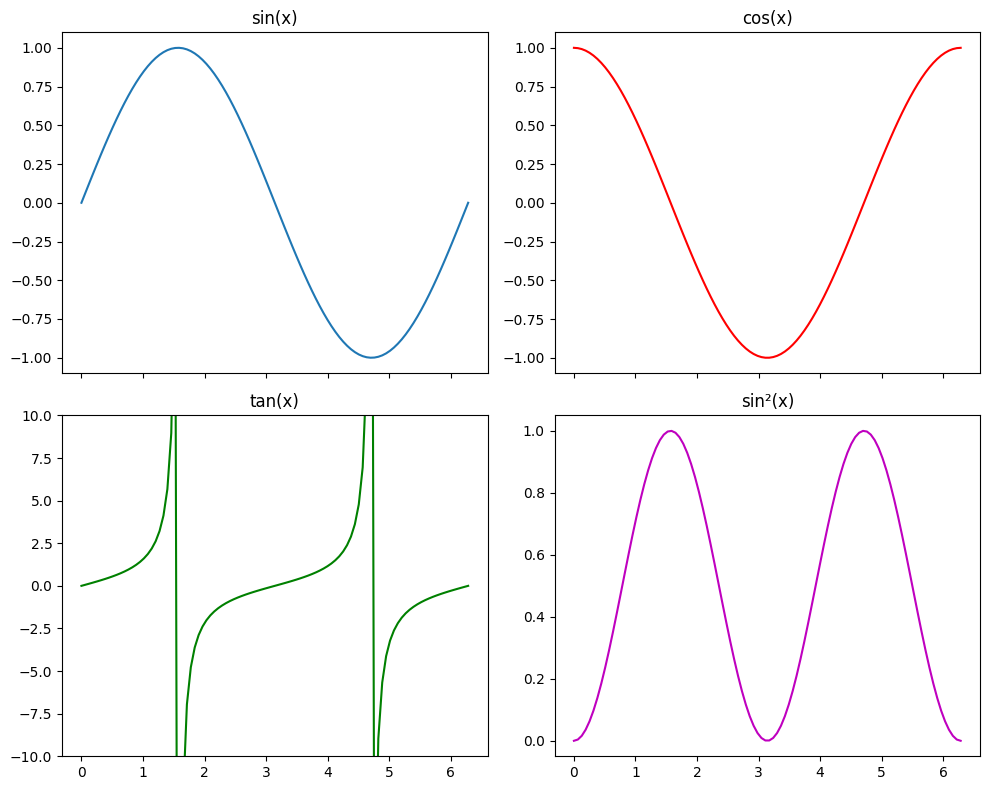

In [3]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharex = True)

axs[0, 0].plot(x, np.sin(x))
axs[0, 0].set_title("sin(x)")

axs[0, 1].plot(x, np.cos(x), 'r')
axs[0, 1].set_title("cos(x)")

axs[1, 0].plot(x, np.tan(x), 'g')
axs[1, 0].set_title("tan(x)")
# Limit tan(x) plot for clarity
axs[1, 0].set_ylim([-10, 10])

axs[1, 1].plot(x, np.sin(x)**2, 'm')
axs[1, 1].set_title("sin²(x)")

plt.tight_layout()
plt.show()

#### Example 3: Adjusting Figure Size and Aspect Ratio

We create a plot of good-old sine function that is 8 inches wide and 4 inches tall

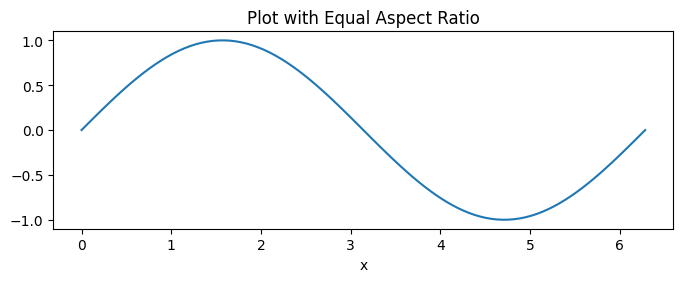

In [4]:
# Plot with a specific aspect ratio (equal aspect)
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, np.sin(x))
ax.set_aspect('equal', adjustable='box')
ax.set_title("Plot with Equal Aspect Ratio")
plt.xlabel("x")
plt.show()

#### Example 4: Formatting and Exporting Plots

For this plot, we will specify the size of the figure in points (unfortunately, the unit conversion process is defined by the user). 
We will use the Poiseuille flow solution as a demonstration for this example. Recall this velocity profile is given by
$$v_x = 2 v_m (1-r^2/R^2),$$
where $v_m = P_l R^2/(4\mu)$ is the mean velocity and $R$ is the radius of the pipe. Note that we will create a plot of $r$ against $v$. Additionally, we will export this plot to a folder in our current working directory. Note that the first lines check whether the directory `./2-exports` exists and creates it otherwise. 

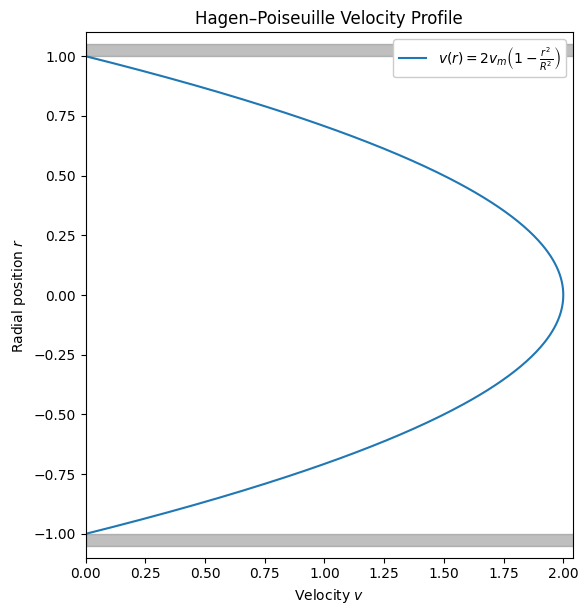

In [5]:
import os
import matplotlib.patches as patches

# Ensure the './2-exports' directory exists
export_dir = "./2-exports"
os.makedirs(export_dir, exist_ok=True)

# Parameters
R = 1.0
v_m = 1.0

# Domain for full pipe: r from -R to R
r = np.linspace(-R, R, 400)
v = 2 * v_m * (1 - (r**2 / R**2))

# Figure size
width_pt = 600
height_pt = 450
width_in = width_pt / 72
height_in = height_pt / 72

fig, ax = plt.subplots(figsize=(width_in, height_in))
ax.plot(v, r, label=r'$v(r) = 2v_m \left(1 - \frac{r^2}{R^2} \right)$')

# Wall thickness (for visual appearance only)
wall_thickness = 0.05
wall_length = 2.2 * v_m  # longer than max velocity for aesthetics

# Add rectangles to represent walls at r = ±R
top_wall = patches.Rectangle((0, R), wall_length, wall_thickness, color='gray', alpha=0.5)
bottom_wall = patches.Rectangle((0, -R - wall_thickness), wall_length, wall_thickness, color='gray', alpha=0.5)

ax.add_patch(top_wall)
ax.add_patch(bottom_wall)

# Axis formatting
ax.set_xlabel('Velocity $v$')
ax.set_ylabel('Radial position $r$')
ax.set_title('Hagen–Poiseuille Velocity Profile')
ax.set_xlim(0, 2 * v_m*1.02)
ax.set_ylim(-R - 0.1, R + 0.1)
ax.legend(loc='upper right',framealpha=1.0)
#ax.grid(True)
ax.set_aspect('equal', adjustable='box')

plt.tight_layout()

# Export
plt.savefig(os.path.join(export_dir, "plot_1.pdf"), format="pdf", bbox_inches="tight", pad_inches=0)
plt.savefig(os.path.join(export_dir, "plot_1.png"), format="png", bbox_inches="tight", pad_inches=0, dpi=400)
plt.show()


If you choose to input the size of the figure in cms you would need to do something like:
```
cm = 1/2.54  # centimeters in inches
plt.subplots(figsize=(15*cm, 5*cm))


#### Example 5: plotting multiple functions in a figure

We now create a plot of a function $y = \sin(ax) e^{-ax/2}$ for several values of $a$. The goal is to define
a colormap that uses a different color for each value of $a$. You can have a look at the pallette of colormaps defined in `Matplotlib` here: https://matplotlib.org/stable/users/explain/colors/colormaps.html. For this application, I have chosen a sequential colormap that varies from purple to red, named `PuRd`.

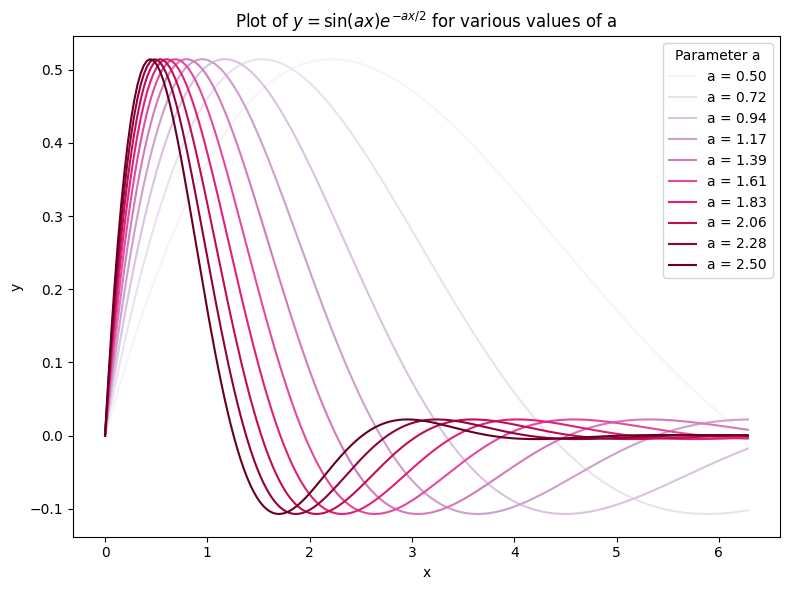

In [6]:
# Define the domain for x
x = np.linspace(0, 2*np.pi, 200)

# Define a range of values for parameter a
a_values = np.linspace(0.5, 2.5, 10)  # 10 values from 0.5 to 2.5

# Choose a colormap
cmap = plt.get_cmap("PuRd")

plt.subplots(figsize=(8, 6))

# Loop over the parameter values and plot f(x, a) with a corresponding color
for i, a in enumerate(a_values):
    y = np.sin(a * x) * np.exp(-a * x/2)
    color = cmap(i / (len(a_values) - 1))  # Normalize index for colormap
    plt.plot(x, y, label=f"a = {a:.2f}", color=color)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of $y = \\sin(ax) e^{-ax/2}$ for various values of a")
plt.legend(title="Parameter a",  loc='upper right')
plt.tight_layout()
plt.show()


Let's compile $\LaTeX$ to give a nicer look to text, labels, and formulas, and have full control of font sizes everywhere (title, legend, ticks, etc.). 

**Warning:** requires LaTeX be installed in your system! Otherwise, just comment the cell below

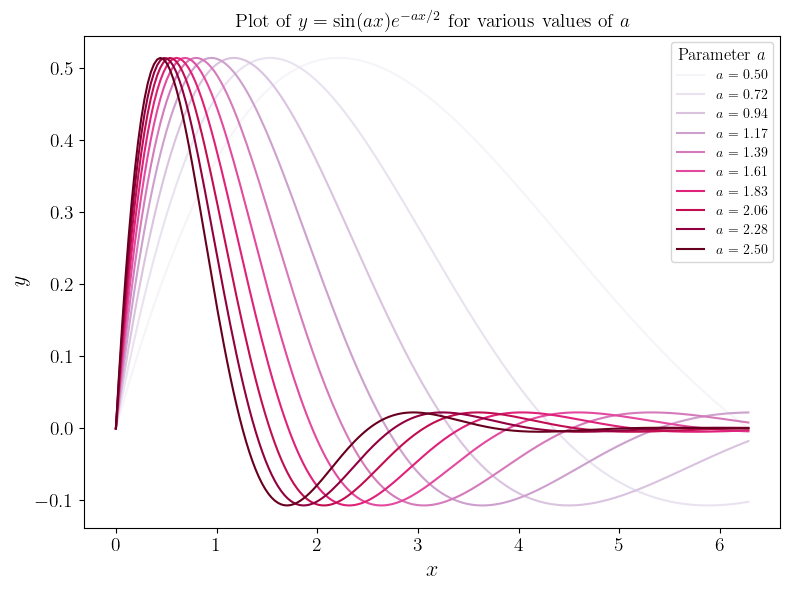

In [7]:
import matplotlib
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}' # This compiles basic mathematical formulas

# Define the domain for x and a range of values for parameter a
x = np.linspace(0, 2*np.pi, 200)
a_values = np.linspace(0.5, 2.5, 10)  # 10 values from 0.5 to 2.5

# Choose a colormap
cmap = plt.get_cmap("PuRd")

plt.subplots(figsize=(8, 6))

# Loop over the parameter values and plot f(x, a) with a corresponding color
for i, a in enumerate(a_values):
    y = np.sin(a * x) * np.exp(-a * x/2)
    color = cmap(i / (len(a_values) - 1))  # Normalize index for colormap
    plt.plot(x, y, label=rf"$a$ = {a:.2f}", color=color)

plt.xlabel(r"$x$",fontsize=16)
plt.ylabel(r"$y$",fontsize=16)
plt.title(r"Plot of $y = \sin(ax) e^{-a x/2}$ for various values of $a$", fontsize = 14)
plt.legend(title=r"Parameter $a$", loc='upper right', fontsize=10, title_fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.savefig(os.path.join(export_dir, "plot_2.pdf"), format="pdf", bbox_inches="tight", pad_inches=0)

plt.show()

This reverts to the default options for `MatplotLib`:

In [8]:
matplotlib.rcdefaults()

#### Example 6: Potential Flow Past a Cylinder 🌀

This example visualizes the 2D potential flow around a circular cylinder using streamlines.  
The flow is modeled as a superposition of uniform flow and a doublet, which we may or may not have discussed during lecture. The stream function is given in cylindrical coordinates by:  
$$
\psi(r, \theta) = U r \left( 1 - \frac{a^2}{r^2} \right) \sin\theta
$$  
Streamlines are plotted as contours of this function, with the cylinder interior masked out. To that end, we first need to define the spatial 2D grid $(x_i,y_j)$, which is carried with the command `meshgrid` that takes as inputs the arrays of x and y values defined by `linspace`.


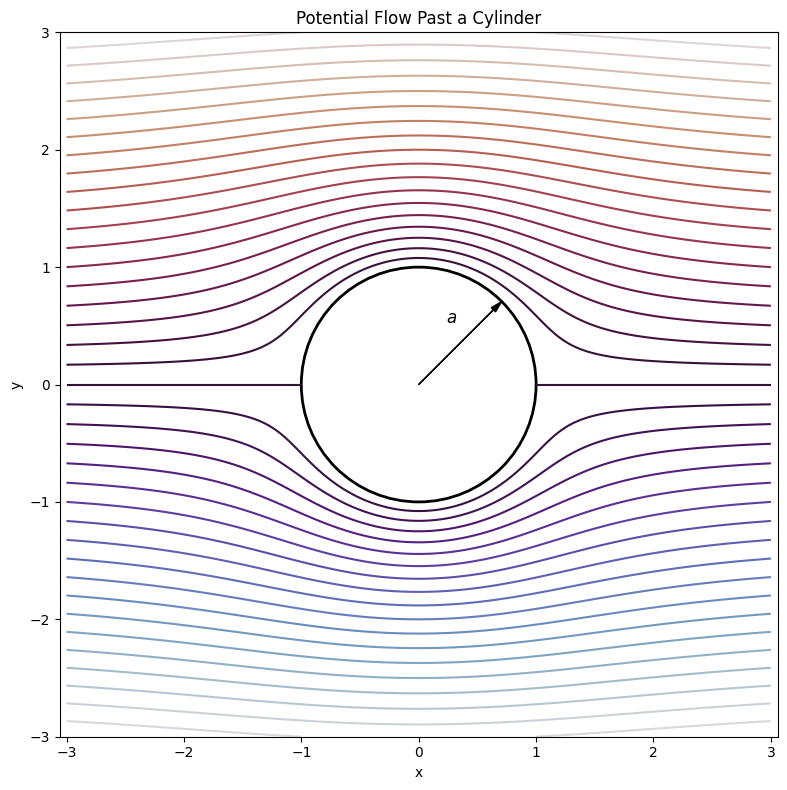

In [9]:
# Cylinder radius and free stream velocity
a = 1.0  # radius of cylinder
U = 1.0  # uniform flow speed

# Create a mesh grid in Cartesian coordinates
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)

# Convert to polar coordinates
R = np.sqrt(X**2 + Y**2)
Theta = np.arctan2(Y, X)

# Avoid division by zero near the origin
R = np.maximum(R, 1e-10)

# Compute the stream function
psi = U * (R - a**2 / R) * np.sin(Theta)

# Mask inside the cylinder
psi[R < a] = np.nan

# Plot streamlines (contour of stream function)
plt.figure(figsize=(8, 8))
contours = plt.contour(X, Y, psi, levels=50, cmap='twilight')
#plt.clabel(contours, inline=True, fontsize=8) # Uncomment this if you want to see the values of \psi in-lined with the contours
#plt.colorbar(contours, label=r'Stream function $\psi$', shrink = 0.8)

# Draw cylinder
circle = plt.Circle((0, 0), a, color='black', fill=False, linewidth=2)
plt.gca().add_artist(circle)

plt.title('Potential Flow Past a Cylinder')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
#plt.grid(True) # Uncomment if you want to see the grid (questionable decision)...


# We can add an arrow to indicate the radius of the cylinder:

import matplotlib.patches as patches

# Angle for arrow (theta_0 = pi/4)
theta0 = np.pi / 4
x_end = a * np.cos(theta0)
y_end = a * np.sin(theta0)

# Add arrow representing radius
plt.arrow(0, 0, x_end, y_end, 
          head_width=0.05, head_length=0.1, 
          length_includes_head=True, color='black')

# Add text label
plt.text(0.4*x_end, 0.8*y_end, rf'$a$', fontsize=12, color='black', ha='center', va='center')

plt.tight_layout()
plt.show()


We can also plot the pressure coefficient, which can be shown to be given by
$$C_p = \frac{p - p_\infty}{\rho U^2/2} =  1 - 4 \sin^2 \theta$$
where $p - p_\infty$ is the gauge pressure at the cylinder wall, obtained from Bernoulli's equation.

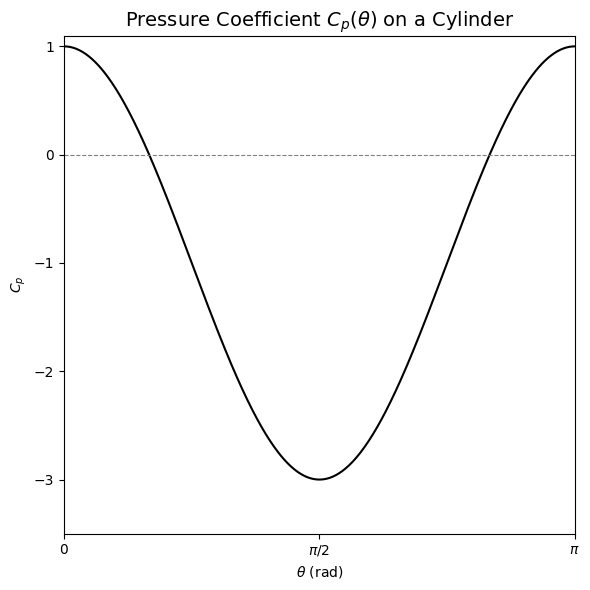

In [10]:
# Angle from 0 to 2π
theta = np.linspace(0, np.pi, 500)

# Pressure coefficient from theory
cp = 1 - 4 * np.sin(theta)**2

# Plot
plt.figure(figsize=(6, 6))
plt.plot(theta, cp, color='black')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)

# Labels and formatting
plt.title(r'Pressure Coefficient $C_p(\theta)$ on a Cylinder', fontsize=14)
plt.xlabel(r'$\theta$ (rad)')
plt.ylabel(r'$C_p$')

plt.xlim(0, np.pi)
plt.ylim(-3.5, 1.1)
plt.xticks(
    [0, np.pi/2, np.pi],
    [r'$0$', r'$\pi/2$', r'$\pi$']
)

plt.tight_layout()
plt.show()


#### Example 7: Potential flow created by a vortex pair

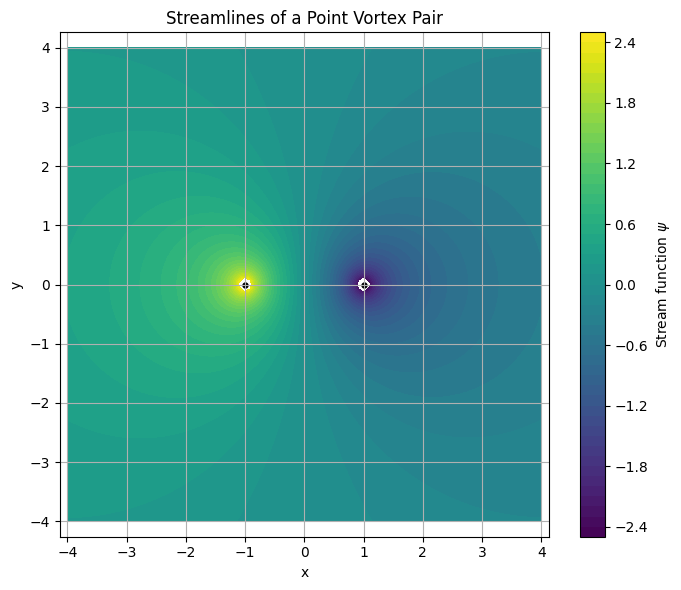

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Vortex strengths
Gamma = 5.0
x1, y1 = -1, 0   # Vortex 1
x2, y2 =  1, 0   # Vortex 2 (opposite sign)

# Grid
x = np.linspace(-4, 4, 400)
y = np.linspace(-4, 4, 400)
X, Y = np.meshgrid(x, y)

# Distances from each vortex
r1_sq = (X - x1)**2 + (Y - y1)**2
r2_sq = (X - x2)**2 + (Y - y2)**2

# Stream function (superposition)
psi = -Gamma/(2*np.pi) * np.log(np.sqrt(r1_sq)) + Gamma/(2*np.pi) * np.log(np.sqrt(r2_sq))

# Mask near the vortices
psi[r1_sq < 0.01] = np.nan
psi[r2_sq < 0.01] = np.nan

# Plot
plt.figure(figsize=(7, 6))
contours = plt.contourf(X, Y, psi, levels=50, cmap='viridis')
plt.colorbar(contours, label=rf'Stream function $\psi$')
plt.scatter([x1, x2], [y1, y2], color='black', s=50, marker='.') # This just plot the vortex centres
plt.title('Streamlines of a Point Vortex Pair')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Example 8: Quivers and vector fields

As you probably remember from kinematics, if the components of a velocity field, say $v_x$ and $v_y$, are given, then we can compute the trajectory, streamlines, streaklines, and pathlines. For this example, we consider the simple flow field 
$$v_x = -y, \quad v_y = x$$
and a produce a magnitude-coloured quiver plot

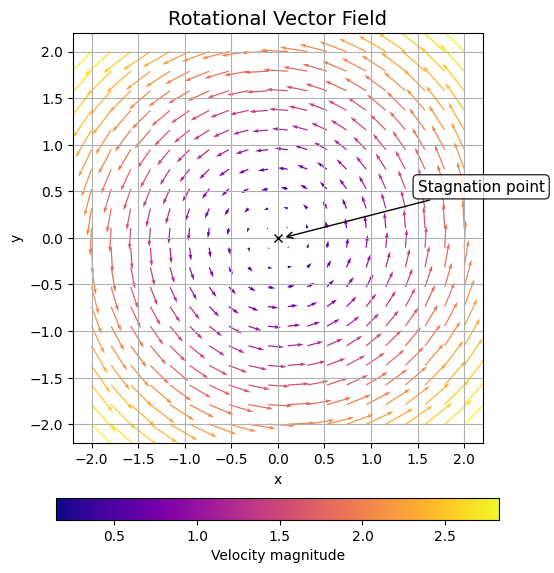

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Create mesh and define vector field
x, y = np.meshgrid(np.linspace(-2, 2, 20), np.linspace(-2, 2, 20))
u = -y
v = x
magnitude = np.sqrt(u**2 + v**2)

# Create figure and axes
fig, ax = plt.subplots(figsize=(6, 6))
quiv = ax.quiver(x, y, u, v, magnitude, cmap='plasma', scale=30) 
# The field "scale" in quiver allows to shorten or lengthen the quivers. The greater the scale factor, the shortes the quivers.

# Colorbar at the top
cb = fig.colorbar(quiv, ax=ax, orientation='horizontal', pad=0.1, shrink=0.8)
cb.set_label('Velocity magnitude')

# Plot cross at stagnation point
ax.plot(0, 0, marker='x', color='black', markersize=6)

# Annotate with a box
ax.annotate("Stagnation point", xy=(0.05, 0.0), xytext=(1.5, 0.5),
            arrowprops=dict(arrowstyle="->"),
            fontsize=11,
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.8))

# Axes formatting
ax.set_aspect('equal')
ax.set_title("Rotational Vector Field", fontsize=14)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid(True)

plt.tight_layout()
plt.show()


#### Example 9: Stem plots

Classic plots for discrete functions, Fourier transforms, sampled signals, etc.

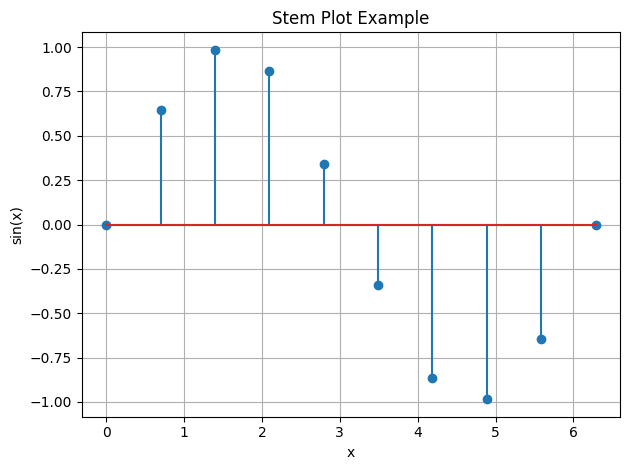

In [13]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 10)
y = np.sin(x)

fig, ax = plt.subplots()
markerline, stemlines, baseline = ax.stem(x, y)  
plt.title("Stem Plot Example")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.grid(True)
plt.tight_layout()
plt.show()


You can also use:

- `xerr` for horizontal error bars
- `fmt='none'` if you just want error bars, no points

#### Example 10: Plotting error bars

Typically used for visualizing uncertainty measurements, stochastic processes, or numerical error ranges.

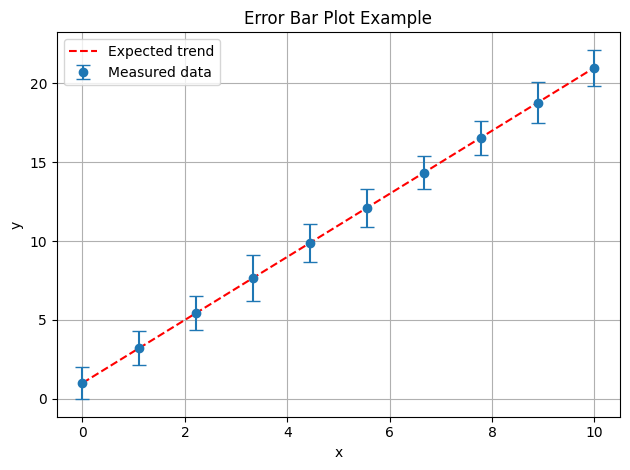

In [14]:
x = np.linspace(0, 10, 10)
y = 2 * x + 1
dy = 1.0 + 0.5 * np.random.rand(10)  # Variable uncertainty

fig, ax = plt.subplots()
ax.errorbar(x, y, yerr=dy, fmt='o', capsize=5, label="Measured data")
ax.plot(x, 2 * x + 1, 'r--', label="Expected trend")

ax.set_title("Error Bar Plot Example")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()
